In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import re

 

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor

from numpy import mean
import scipy
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
available_ip = pd.read_csv('available_input.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
available_ip

,Year,Month,Count,average_high_celsius,daily_mean_celsius,average_low_celsius,average_precipitation_mm,average_precipitation_days,average_relative_hummidity,Country_Belgium,...,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,2010,1,54.0,17.5,8.1,5.3,2.4,-15.6,62.6,1,...,0,0,0,0,0,0,0,0,0,0
1,2010,2,54.0,18.1,8.3,5.3,2.3,-13.4,48.8,1,...,0,0,0,0,0,0,0,0,0,0
2,2010,3,54.0,23.4,10.2,6.8,3.4,-9.8,52.7,1,...,0,0,0,0,0,0,0,0,0,0
3,2010,4,14.0,22.7,12.1,8.3,4.6,-7.2,54.1,1,...,0,0,0,0,0,0,0,0,0,0
4,2010,5,14.0,26.8,14.8,10.9,6.9,-5.6,59.5,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,2022,5,21.0,26.8,14.8,10.9,6.9,-5.6,59.5,0,...,0,0,0,0,0,0,0,1,0,0
1832,2022,6,21.0,28.7,17.6,13.6,9.6,-0.7,66.7,0,...,0,0,0,0,0,0,0,1,0,0
1833,2022,7,21.0,33.1,19.5,15.6,11.7,1.8,56.2,0,...,0,0,0,0,0,0,0,1,0,0
1834,2022,8,21.0,30.6,19.2,15.3,11.5,0.6,73.3,0,...,0,0,0,0,0,0,0,1,0,0


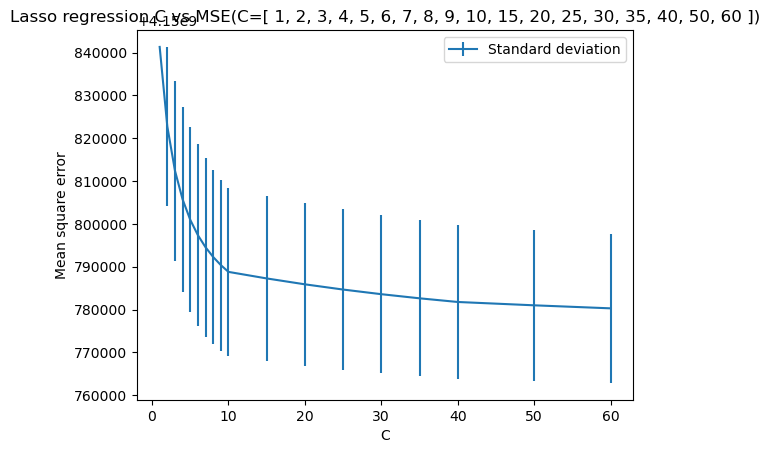

In [3]:
c_range = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60]
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2)
mean_error = []; mse_temp = [];  std_error = []
for C in c_range:
    lasso_model = linear_model.Lasso(alpha = 1/(2*C))
    lasso_model.fit(X_Train, y_Train)
    ypred = lasso_model.predict(X_Test)
    mse = mean_squared_error(y_Test, ypred)
    mse_temp.append(mse)
    mean_error.append(np.array(mse_temp).mean())
    std_error.append(np.array(mse_temp).std())
plt.errorbar(c_range, mean_error, yerr=std_error)
plt.xlabel('C')
plt.ylabel('Mean square error')
plt.title('Lasso regression C vs MSE(C=[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 60 ])')
plt.legend(['Standard deviation'])
plt.show()

In [89]:
def fitting_models_CV():
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    LR_Model = LinearRegression()
    LS_Model = Lasso(alpha = 1/(2*10))
    R_Model = Ridge(alpha=1.5)
    DT_Model = DecisionTreeRegressor(max_depth=50)
    RFT_Model = RandomForestRegressor()
    GBR_Model = GradientBoostingRegressor()
    KNR_Model = KNeighborsRegressor(n_neighbors=20)
    ALL_Model = [('Linear Regression', LR_Model),
        ('Lasso', LS_Model),
        ('Ridge', R_Model),
        ('Decision Tree', DT_Model),
        ('Random Forest', RFT_Model),
        ('Gradient Boosting', GBR_Model),
        ('KNearest Neighbor',KNR_Model)       
    ]
    for name_of_model, model in ALL_Model:
        scores = cross_val_score(model, available_ip, available_op, cv=cv) 
        #rg.fit(X_train,y_train)
        #pred = rg.predict(X_test)
        score = format(mean(scores), '.4f')
        print("{} : {}".format(name_of_model, score))

In [90]:
fitting_models_CV()

Linear Regression : 0.8085
Lasso : 0.8084
Ridge : 0.8086
Decision Tree : 0.9584
Random Forest : 0.9730
Gradient Boosting : 0.9591
KNearest Neighbor : 0.1401


# GradientBoostingRegressor

In [68]:


scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = GradientBoostingRegressor(max_depth=5, n_estimators=100)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.9740978651133159
1 --> 0.9710412902796911
2 --> 0.967221805159959
3 --> 0.9685769403600272
4 --> 0.9670818910463415
5 --> 0.9667688328179148
6 --> 0.9681222146339012
7 --> 0.9686924898664545
8 --> 0.9670893715734052
9 --> 0.966577996801789


# LinearRegression

In [69]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8195090957324738
1 --> 0.8122631249456486
2 --> 0.8134655959787835
3 --> 0.8139013548378464
4 --> 0.8147277555861776
5 --> 0.8156797038834671
6 --> 0.8155785523005288
7 --> 0.8165600984032455
8 --> 0.8158136216389437
9 --> 0.8154589649213634


# Lasso

In [71]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Lasso(alpha = 1/(2*10))
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8205254016221042
1 --> 0.8214128064823598
2 --> 0.8172556906072951
3 --> 0.8171895291508738
4 --> 0.8164307062896999
5 --> 0.8167684718384784
6 --> 0.8151409187017974
7 --> 0.8161704919953445
8 --> 0.8162643125937307
9 --> 0.8163050011411161


# DecisionTreeRegressor

In [72]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = DecisionTreeRegressor(max_depth=100)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.9468153787498294
1 --> 0.9508617203902562
2 --> 0.9527614433857171
3 --> 0.9547963997262464
4 --> 0.952117752070064
5 --> 0.9511402739139155
6 --> 0.9495016104220618
7 --> 0.949620770242848
8 --> 0.9485725839147553
9 --> 0.9485303541361649


# RandomForestRegressor

In [73]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = RandomForestRegressor()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.961817011427138
1 --> 0.9618978017194564
2 --> 0.9615305969601755
3 --> 0.962389656380034
4 --> 0.9641979012308022
5 --> 0.9650620148802496
6 --> 0.9645824204945512
7 --> 0.9638203200461639
8 --> 0.9646555348244277
9 --> 0.9652622613622066


# KNeighborsRegressor(n_neighbors=20)

In [74]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = KNeighborsRegressor(n_neighbors=10)
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.19472743260438374
1 --> 0.19427207483464184
2 --> 0.19036097344278644
3 --> 0.19434107297604677
4 --> 0.19714550722984478
5 --> 0.19962523242657512
6 --> 0.19866277550001044
7 --> 0.1976034594079146
8 --> 0.1988569203667018
9 --> 0.19619674964066722


In [75]:
cv = RepeatedKFold(n_splits=10, n_repeats=1)#, random_state=1)
reg_bg = BaggingRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, n_estimators=100),
                        n_estimators=20, random_state=0)
scores = cross_val_score(reg_bg, available_ip, available_op, cv=cv)
score = format(mean(scores), '.4f')
print(score)

0.9767
